# Using Regression AI Algorithm to Predict University Admission

In this project, I'm using a regression AI model to predict column 'Chance of Admission' using the other columns such as the 'TOEFL score'.

This will allow me to predict which students will be able to enroll at an univeristy, which students are top of their class or school.

Data provided by Codecademy.

## **Loading and Inspecting The Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [ ]:
dataset = pd.read_csv('admissions_data.csv')

In [ ]:
print(dataset.head())
print(dataset.columns.values.tolist())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


Removing ID column 'Serial No.' as it doesn't provide any useful information.

In [ ]:
dataset = dataset.drop(['Serial No.'], axis=1)

In [ ]:
labels = dataset.iloc[:, -1]
features = dataset.iloc[:, 0:-1]

In [ ]:
print(labels.head())
print(features.head())

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0


In [ ]:
print("Number of features: ", features.shape[1])
print("Number of samples: ", features.shape[0])

Number of features:  7
Number of samples:  500


We have 6 features we can use to predict the chance of admission and 500 data points.

In [ ]:
print("Number of labels: ", labels.shape[0])

Number of labels:  500


Summary stats to check if any feature is skewed.

In [ ]:
print(features.describe())

        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  
count  500.000000  500.000000  
mean     8.576440    0.560000  
std      0.604813    0.496884  
min      6.800000    0.000000  
25%      8.127500    0.000000  
50%      8.560000    1.000000  
75%      9.040000    1.000000  
max      9.920000    1.000000  


In [ ]:
print(labels.describe())

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit , dtype: float64


## **Scaling Features**

Split dataset into 70% training and 30% test, standard split, random state of 101 for replicability.

Using StandardScaler to standardise all features to the same dimensionality, prevents bias where one feature skews the prediction too much.

Makes all the features follow Normal Distribution and gets rid of individual means.

In [ ]:
features = pd.get_dummies(features)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=101)

In [ ]:
sc = StandardScaler()

In [ ]:
features_train_scaled = sc.fit_transform(features_train)

In [ ]:
features_test_scaled = sc.transform(features_test)

In [ ]:
features_train_scaled.shape[1]

7

In [ ]:
features_train.shape[1]

7

## **Creating My Model**

Used trial and error, a model with 3 Dense layers worked best.

Added dropout layers with rate of 20% to prevent the model from overfitting to training and test data too much.

Final Dense layer with 1 neuron and sigmoid activation to predict the desired column, using sigmoid as I'm predicting only 1 variable.

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError, MeanAbsoluteError

In [ ]:
model = Sequential()
model.add(Input(shape=(features_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
my_opt = Adam(learning_rate=0.001)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
model.compile(loss='mse', metrics=['mae'], optimizer=my_opt)

## **Training My Model**

In [ ]:
history = model.fit(features_train_scaled, labels_train.to_numpy(),
                    epochs=100, batch_size=7,
                    validation_data=(features_test_scaled, labels_test.to_numpy()), verbose=1,
                    callbacks=[early_stop])

Epoch 1/100
50/50 [==============================] - 1s 8ms/step - loss: 0.0323 - mae: 0.1536 - val_loss: 0.0153 - val_mae: 0.1038
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0193 - mae: 0.1117 - val_loss: 0.0102 - val_mae: 0.0804
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0152 - mae: 0.0970 - val_loss: 0.0084 - val_mae: 0.0713
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0146 - mae: 0.0946 - val_loss: 0.0076 - val_mae: 0.0691
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0116 - mae: 0.0845 - val_loss: 0.0072 - val_mae: 0.0677
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0124 - mae: 0.0873 - val_loss: 0.0068 - val_mae: 0.0662
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0105 - mae: 0.0820 - val_loss: 0.0065 - val_mae: 0.0655
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0103 - m

## **Evaluating The Model's Performance**

Using Mean Absolute Loss, Pearson Correlation Coefficient (R^2) and validation loss to evaluate how well my model can predict chance of admission.

In [ ]:
val_mae, val_mse = model.evaluate(features_test_scaled, labels_test.to_numpy(), verbose=1)

5/5 [==============================] - 0s 3ms/step - loss: 0.0035 - mae: 0.0428


Mean Absolute Error - the lower the better, checking MAE for test dataset.

In [ ]:
print("MAE: ", val_mae)

MAE:  0.003530955407768488


In [ ]:
y_pred = model.predict(features_test_scaled)

5/5 [==============================] - 0s 3ms/step


R^2 value, determines fit of the model's predictions to true test values! How close they are.

In [ ]:
print(r2_score(labels_test, y_pred))

0.8088468271826802


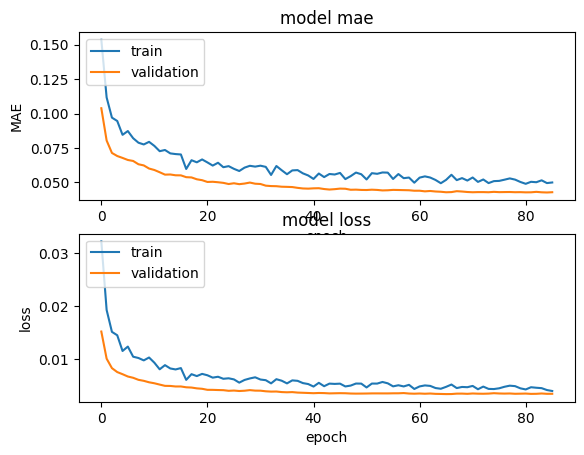

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

The validation loss and validation mean absolute error decrease to be nearly non-existent over epochs, that means the model is very precise and accurate!